# **Capstone project: Providing data-driven suggestions for HR**

Data Source:
[Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import packages

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:


# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)





### Gather basic information about the data

In [ ]:
# Gather basic information about the data
df0.dtypes



satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

### Gather descriptive statistics about the data

In [ ]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

In [ ]:
# Display all column names
df0.columns = (
    df0.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
)

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [ ]:
# Rename columns as needed

df0 = df0.rename(columns={
    'satisfaction_level': 'satisfaction',
    'last_evaluation': 'evaluation',
    'number_project': 'num_project',
    'average_montly_hours': 'avg_hours',
    'time_spend_company': 'tenure',
    'work_accident': 'accident',
    'promotion_last_5years': 'promotion_5y',
    'department': 'dept'
})

# Display all column names after the update
df0.columns


Index(['satisfaction', 'evaluation', 'num_project', 'avg_hours', 'tenure',
       'accident', 'left', 'promotion_5y', 'dept', 'salary'],
      dtype='object')

### Check missing values

In [ ]:
# Check for missing values
df0.isnull().sum()

satisfaction    0
evaluation      0
num_project     0
avg_hours       0
tenure          0
accident        0
left            0
promotion_5y    0
dept            0
salary          0
dtype: int64

### Check duplicates

In [ ]:
# Check for duplicates
df0.duplicated().sum()

3008

In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
# Display duplicated rows (all occurrences)
df0[df0.duplicated(keep=False)]
df = df0.drop_duplicates()
# Display first few rows of new dataframe as needed
df.duplicated().sum()

0

### Check outliers

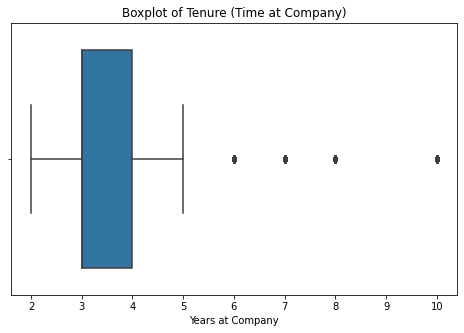

In [ ]:
# Create a boxplot to visualize distribution of `time_spend_company` and detect any outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for tenure
plt.figure(figsize=(8,5))
sns.boxplot(x=df['tenure'])
plt.title('Boxplot of Tenure (Time at Company)')
plt.xlabel('Years at Company')
plt.show()


In [ ]:
# Determine the number of rows containing outliers
# Calculate IQR
Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = df[(df['tenure'] < Q1 - 1.5*IQR) | (df['tenure'] > Q3 + 1.5*IQR)]

# Number of rows containing outliers
num_outliers = outliers.shape[0]
print(f"Number of rows with outliers in 'tenure': {num_outliers}")


Number of rows with outliers in 'tenure': 824


 Data Exploration (Continue EDA)



In [ ]:
# Get numbers of people who left vs. stayed
# ==============================
# Count of employees who left vs stayed
# ==============================
left_counts = df['left'].value_counts()
print("stayed vs left:")
print(left_counts)

# ==============================
# Percentage of employees who left vs stayed
# ==============================
left_percent = df['left'].value_counts(normalize=True) * 100
print("\nPercentage of employees who stayed vs left:")
print(left_percent.round(2))
# Get percentages of people who left vs. stayed


stayed vs left:
0    10000
1     1991
Name: left, dtype: int64

Percentage of employees who stayed vs left:
0    83.4
1    16.6
Name: left, dtype: float64


### Data visualizations

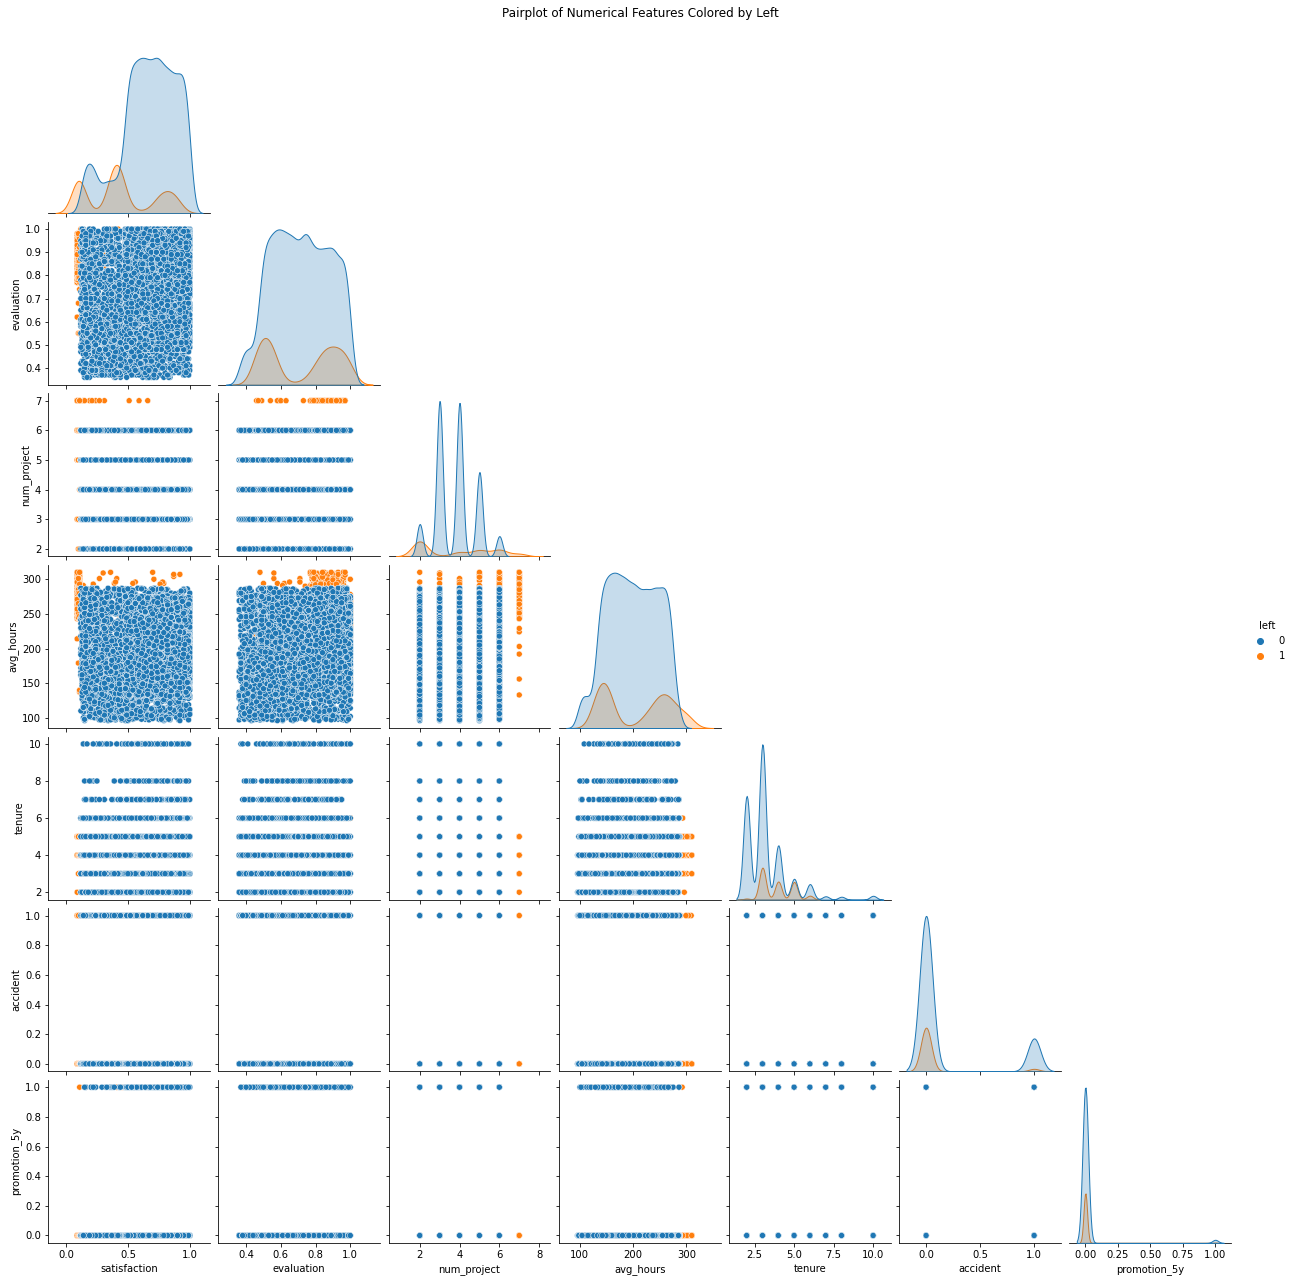

In [ ]:
# Create a plot as needed
sns.pairplot(df, hue='left', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Numerical Features Colored by Left', y=1.02)
plt.show()

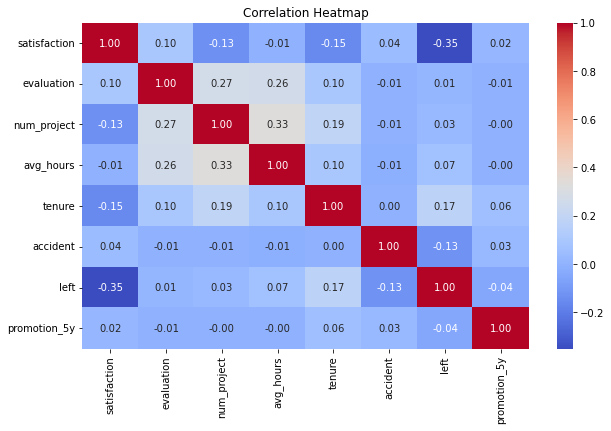

In [ ]:
# Create a plot as needed
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

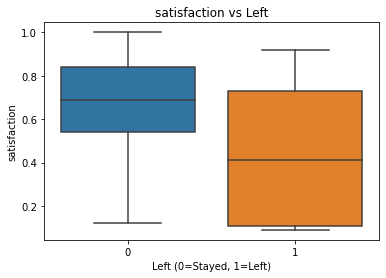

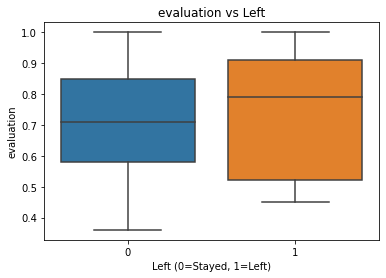

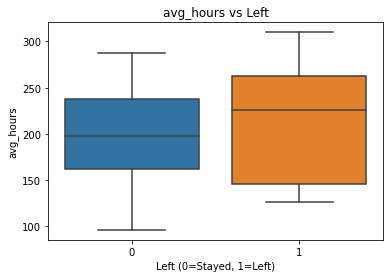

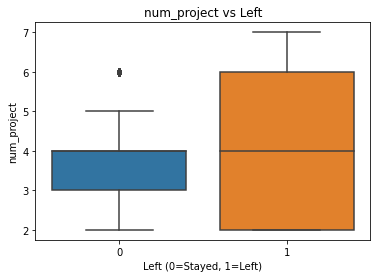

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features to check vs 'left'
features = ['satisfaction', 'evaluation', 'avg_hours', 'num_project']

for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='left', y=feature, data=df)
    plt.title(f'{feature} vs Left')
    plt.xlabel('Left (0=Stayed, 1=Left)')
    plt.ylabel(feature)
    plt.show()

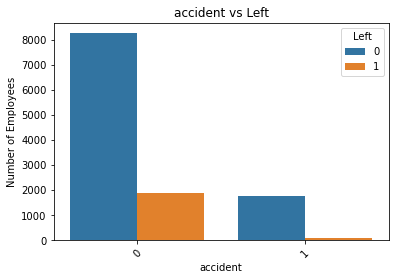

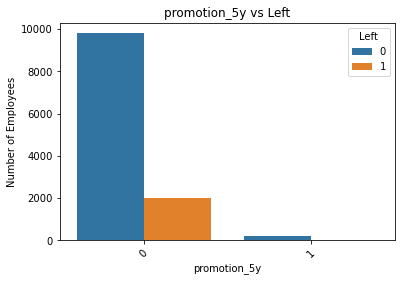

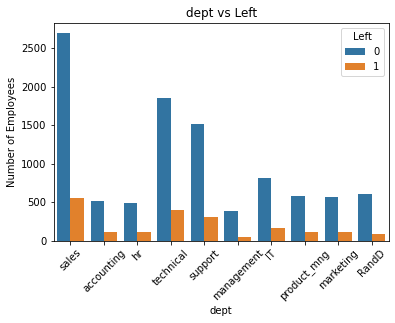

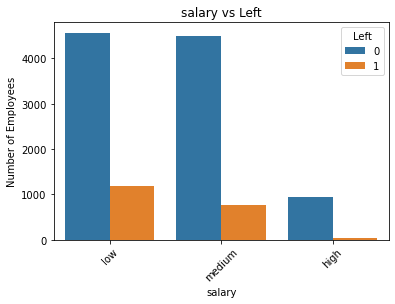

In [ ]:
# Create a plot as needed
categorical_cols = ['accident', 'promotion_5y', 'dept', 'salary']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='left', data=df)
    plt.title(f'{col} vs Left')
    plt.xlabel(col)
    plt.ylabel('Number of Employees')
    plt.legend(title='Left', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()

### Modeling



In [33]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# 1. Define features and target
X = df.drop(columns=['left'])
y = df['left']

numeric_features = ['satisfaction', 'evaluation', 'num_project', 'avg_hours', 'tenure']
categorical_features = ['accident', 'promotion_5y', 'dept', 'salary']

# 2. Preprocessing
numeric_transformer = 'passthrough'
categorical_transformer = OneHotEncoder(drop='first')

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 3. Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Pipeline
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')

clf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', log_reg)
])

# 5. Fit
clf.fit(X_train, y_train)

# 6. Evaluate
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

AUC: 0.8481776699589902
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2001
           1       0.43      0.84      0.57       398

    accuracy                           0.79      2399
   macro avg       0.69      0.81      0.71      2399
weighted avg       0.87      0.79      0.81      2399

Confusion matrix:
 [[1552  449]
 [  63  335]]


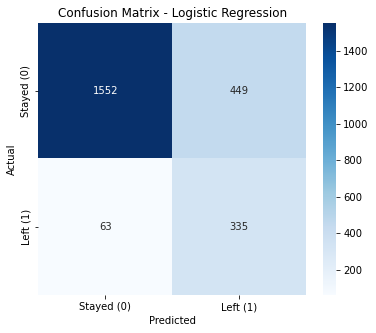

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Stayed (0)', 'Left (1)'],
    yticklabels=['Stayed (0)', 'Left (1)']
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [19]:
df['left'].value_counts(normalize=True).mul(100).round(2)

0    83.4
1    16.6
Name: left, dtype: float64

In [20]:
import pandas as pd
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

report_df

,precision,recall,f1-score,support
0,0.960991,0.775612,0.858407,2001.000000
1,0.427296,0.841709,0.566836,398.000000
accuracy,0.786578,0.786578,0.786578,0.786578
macro avg,0.694143,0.808660,0.712621,2399.000000
weighted avg,0.872449,0.786578,0.810035,2399.000000


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Decision Tree
dt = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', DecisionTreeClassifier(
        max_depth=5,
        random_state=42,
        class_weight='balanced'
    ))
])

# Fit
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

# Evaluate
print("Decision Tree AUC:", roc_auc_score(y_test, y_proba_dt))
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree AUC: 0.9530655526508103
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2001
           1       0.75      0.94      0.83       398

    accuracy                           0.94      2399
   macro avg       0.87      0.94      0.90      2399
weighted avg       0.95      0.94      0.94      2399

Confusion Matrix:
 [[1874  127]
 [  22  376]]


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define pipeline
dt_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

# Hyperparameter grid
param_grid = {
    'model__max_depth': [3, 5, 7, 10, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 5]
}

# Grid search (using ROC AUC since it's churn)
grid_dt = GridSearchCV(
    dt_pipeline,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Fit
grid_dt.fit(X_train, y_train)

# Best results
print("Best AUC score (CV):", grid_dt.best_score_)
print("Best parameters:", grid_dt.best_params_)

Best AUC score (CV): 0.9625970015056431
Best parameters: {'model__max_depth': 7, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10}


In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=42,
        class_weight='balanced'
    ))
])

# Fit
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate
print("Random Forest AUC:", roc_auc_score(y_test, y_proba_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest AUC: 0.9799107983696593
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2001
           1       0.99      0.92      0.95       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399

Confusion Matrix:
 [[1997    4]
 [  31  367]]


In [24]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Decision Tree training predictions
y_train_pred_dt = dt.predict(X_train)
y_train_proba_dt = dt.predict_proba(X_train)[:, 1]

print("Decision Tree - Training AUC:", roc_auc_score(y_train, y_train_proba_dt))
print(classification_report(y_train, y_train_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_dt))

Decision Tree - Training AUC: 0.9621458881355777
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      7999
           1       0.75      0.94      0.84      1593

    accuracy                           0.94      9592
   macro avg       0.87      0.94      0.90      9592
weighted avg       0.95      0.94      0.94      9592

Confusion Matrix:
 [[7501  498]
 [  88 1505]]


In [25]:
# Random Forest training predictions
y_train_pred_rf = rf.predict(X_train)
y_train_proba_rf = rf.predict_proba(X_train)[:, 1]

print("Random Forest - Training AUC:", roc_auc_score(y_train, y_train_proba_rf))
print(classification_report(y_train, y_train_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_rf))

Random Forest - Training AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      1593

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592

Confusion Matrix:
 [[7999    0]
 [   0 1593]]


In [26]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)

def evaluate_model(model, X, y, dataset_name="Dataset"):
    """
    Evaluate classification model performance.
    """
    
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]
    
    print(f"\n--- {dataset_name} Evaluation ---")
    print("AUC:", round(roc_auc_score(y, y_proba), 4))
    print("Accuracy:", round(accuracy_score(y, y_pred), 4))
    print("Precision (Class 1):", round(precision_score(y, y_pred), 4))
    print("Recall (Class 1):", round(recall_score(y, y_pred), 4))
    print("F1-score (Class 1):", round(f1_score(y, y_pred), 4))
    print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

In [27]:
evaluate_model(dt, X_test, y_test, dataset_name="Decision Tree - Test")


--- Decision Tree - Test Evaluation ---
AUC: 0.9531
Accuracy: 0.9379
Precision (Class 1): 0.7475
Recall (Class 1): 0.9447
F1-score (Class 1): 0.8346
Confusion Matrix:
 [[1874  127]
 [  22  376]]


In [28]:
evaluate_model(rf, X_test, y_test, dataset_name="Random Forest - Test")


--- Random Forest - Test Evaluation ---
AUC: 0.9799
Accuracy: 0.9854
Precision (Class 1): 0.9892
Recall (Class 1): 0.9221
F1-score (Class 1): 0.9545
Confusion Matrix:
 [[1997    4]
 [  31  367]]


In [29]:
final_model = rf

y_test_pred = final_model.predict(X_test)
y_test_proba = final_model.predict_proba(X_test)[:, 1]

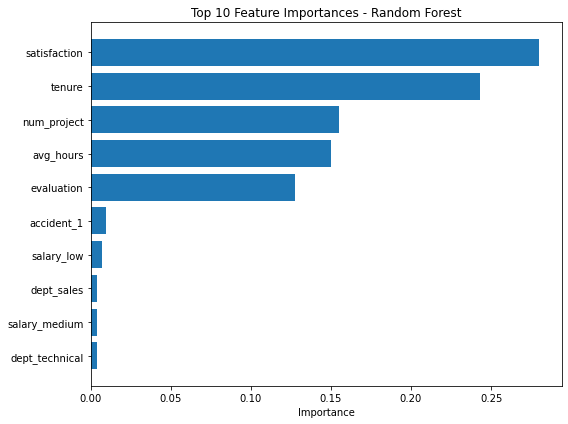

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Use your fitted random forest pipeline
rf_model = final_model   # or rf_model = rf

# Extract feature importances
importances = rf_model.named_steps['model'].feature_importances_

# Get feature names from the preprocessing step
numeric_features = ['satisfaction', 'evaluation', 'num_project', 'avg_hours', 'tenure']
categorical_features = ['accident', 'promotion_5y', 'dept', 'salary']

cat_transformer = rf_model.named_steps['preprocess'].named_transformers_['cat']
cat_features = cat_transformer.get_feature_names(categorical_features)

feature_names = np.concatenate([numeric_features, cat_features])

# Create dataframe
feature_importance_df = (
    pd.DataFrame({'feature': feature_names,
                  'importance': importances})
      .sort_values(by='importance', ascending=False)
)

# Top 10 plot
top10 = feature_importance_df.head(10).sort_values('importance', ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(top10['feature'], top10['importance'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


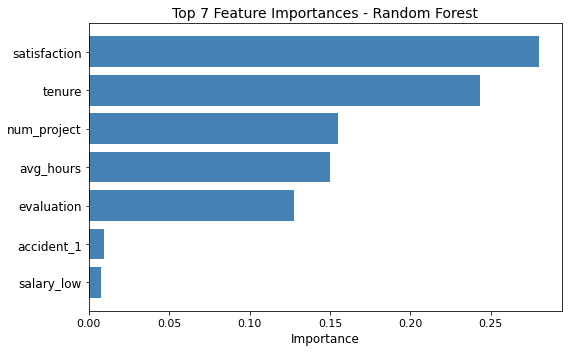

In [31]:
# Keep only top 7 instead of top 10
top = (
    feature_importance_df
    .head(7)                      # was head(10)
    .sort_values('importance', ascending=True)
)

plt.figure(figsize=(8, 5))

plt.barh(top['feature'], top['importance'], color='steelblue')

# Bigger text
plt.xlabel('Importance', fontsize=12)
plt.title('Top 7 Feature Importances - Random Forest', fontsize=14)
plt.yticks(fontsize=12)          # feature labels bigger
plt.xticks(fontsize=11)

plt.tight_layout()
plt.show()


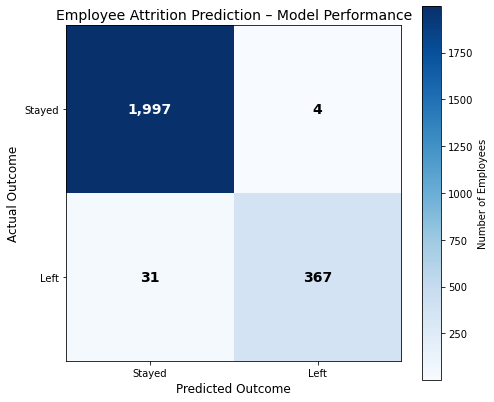

In [34]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Predict on test set
y_pred = rf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,6))

# Blue gradient
plt.imshow(cm, cmap="Blues")

plt.title("Employee Attrition Prediction – Model Performance", fontsize=14)
plt.xlabel("Predicted Outcome", fontsize=12)
plt.ylabel("Actual Outcome", fontsize=12)

plt.xticks([0,1], ["Stayed", "Left"])
plt.yticks([0,1], ["Stayed", "Left"])

# Add numbers inside cells with contrast-aware coloring
for i in range(2):
    for j in range(2):
        color = "white" if cm[i, j] > cm.max()/2 else "black"
        plt.text(j, i, f"{cm[i, j]:,}", 
                 ha="center", va="center",
                 fontsize=14, fontweight="bold",
                 color=color)

plt.colorbar(label="Number of Employees")
plt.tight_layout()
plt.show()